In [2]:
import kagglehub
import shutil
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import seaborn as sns
from PIL import Image

In [3]:
path = kagglehub.dataset_download("murtozalikhon/brain-tumor-multimodal-image-ct-and-mri")
target_dir = "/brain_scans"

!mkdir -p {target_dir}
shutil.move(path, target_dir)

print(f"Dataset moved to: {target_dir}")


100%|██████████| 361M/361M [00:05<00:00, 66.3MB/s]

Extracting files...


Dataset moved to: /brain_scans


In [26]:
directories = ["/brain_scans/1/Dataset/Brain Tumor CT scan Images/Healthy",
               "/brain_scans/1/Dataset/Brain Tumor CT scan Images/Tumor",
               "/brain_scans/1/Dataset/Brain Tumor MRI images/Healthy",
               "/brain_scans/1/Dataset/Brain Tumor MRI images/Tumor"
               ]

image_files = [[]] * len(directories)

for i, dir in enumerate(directories):
  image_files[i] = [f for f in os.listdir(dir) if f.endswith('.jpg')]




# Visualize images
"""
for dir in directories:
  for img_file in image_files:
      img_path = os.path.join(directory, img_file)
      img = mpimg.imread(img_path)  # Load the image
      plt.imshow(img, cmap='gray')  # Display the image (use cmap='gray' for grayscale images)
      plt.title(f"Image: {img_file}")
      plt.axis('off')  # Turn off axis
      plt.show()
"""


TypeError: join() argument must be str, bytes, or os.PathLike object, not 'list'

In [5]:
def see_least(image_files) -> int: #desc shall be added
  import numpy as np
  from typing import List
  return np.min([np.shape(row)[0] for row in image_files])

In [6]:
see_least(image_files)

1716

In [7]:
image_files[1][1]

'ct_tumor (891).jpg'

In [8]:
"""
The following code should work properly normally, but due to the matplotlib inner limitations, combined with google collab ones I had to
change the following code to the code that is below

cancer_scans_in_divisions = ["Healthy, CT scan image",
                             "Sick, CT scan image",
                             "Healthy MRI image",
                             "Sick MRI image"]

images = [[None for _ in range(4)] for _ in range(4)]

rand_img_indices = []

for i, group in enumerate(image_files):
  for j in range(4):
    rand_img_index = np.random.randint(low=0, high=len(group))
    if not rand_img_indices:
      rand_img_indices.append(np.random.randint(low=0, high=len(group)))
    else:
      if rand_img_index in rand_img_indices:
        while rand_img_index in rand_img_indices:
          rand_img_indices.append(np.random.randint(low=0, high=len(group)))
      else:
        rand_img_indices.append(np.random.randint(low=0, high=len(group)))
    img = os.path.join(directories[i], group[rand_img_index])
    img = mpimg.imread(img)
    images[i][j] = img

random_img_indices_2d = [[rand_img_indices[x] for x in range(y*4, (y+1)*4)] for y in range(4)]

fig, axes = plt.subplots(figsize=(7, 5),
                          nrows=2,
                          ncols=2,
                          sharex=True)

for i, row in enumerate(axes):
    fig.text(0.5, 0.92 - (i * 0.23), cancer_scans_in_divisions[i], ha="center", fontsize=14, fontweight="bold")


for k, row in enumerate(axes):
  for l, element in enumerate(axes[k]):
    element.imshow(images[k][l], cmap="gray")
    element.set_title(f"Photo number {random_img_indices_2d[k][l]}.")
    element.axis('off')
plt.suptitle("Brain scans pre-classified by tumor occurence")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
"""

'\nThe following code should work properly normally, but due to the matplotlib inner limitations, combined with google collab ones I had to\nchange the following code to the code that is below\n\ncancer_scans_in_divisions = ["Healthy, CT scan image",\n                             "Sick, CT scan image",\n                             "Healthy MRI image",\n                             "Sick MRI image"]\n\nimages = [[None for _ in range(4)] for _ in range(4)]\n\nrand_img_indices = []\n\nfor i, group in enumerate(image_files):\n  for j in range(4):\n    rand_img_index = np.random.randint(low=0, high=len(group))\n    if not rand_img_indices:\n      rand_img_indices.append(np.random.randint(low=0, high=len(group)))\n    else:\n      if rand_img_index in rand_img_indices:\n        while rand_img_index in rand_img_indices:\n          rand_img_indices.append(np.random.randint(low=0, high=len(group)))\n      else:\n        rand_img_indices.append(np.random.randint(low=0, high=len(group)))\n    im

The conclusions to be derived from this, shall be as follow, the network should be of mediocre depth, the data should be augmented, and in the second step I presume that making double or triple Conv2d, might yield proper results due to the  

In [9]:
path = "/brain_scans/1/Dataset/Brain Tumor CT scan Images/Tumor/ct_tumor (1196).jpg"
img = Image.open(path)
width, height = img.size
height

640

In [10]:
group_sizes = [np.shape(group)[0] for group in image_files] #They should be of equal sizes i.e. for now the model will(in terms of logical inference) be biased towards saying cancer
group_sizes

[1716, 2157, 1997, 2984]

In [11]:
widths, heights = [[0 for x in range(group_sizes[y])] for y in range(4)], [[0 for x in range(group_sizes[y])] for y in range(4)]
for i, group in enumerate(image_files):
  for j, file in enumerate(group):
    path = directories[i] + f"/{file}"
    img = Image.open(path)
    width, height = img.size
    widths[i][j] = width
    heights[i][j] = height




In [12]:
np.min([np.min(row) for row in widths])

100

In [13]:
np.max([np.max(row) for row in widths]) # This easy test proofs the disproportions, I shall do smth about this.

1375

Brain scans pre-classified by tumor occurence 



640
512
640
640


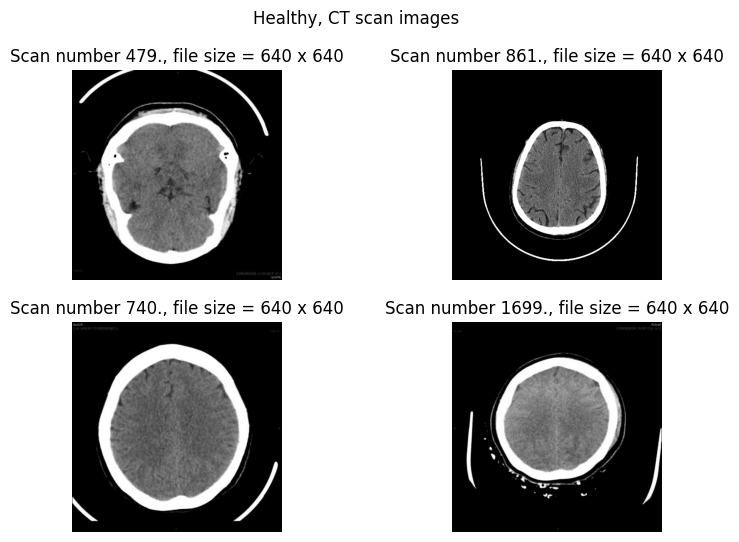




640
640
640
640


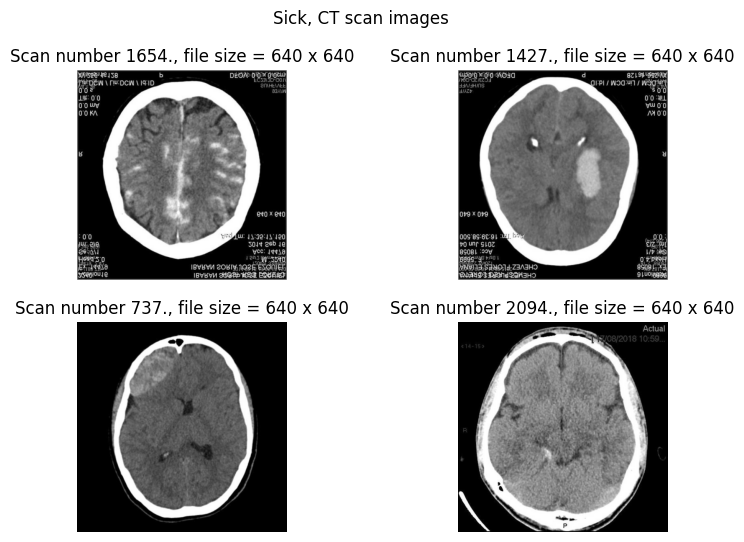




225
680
256
225


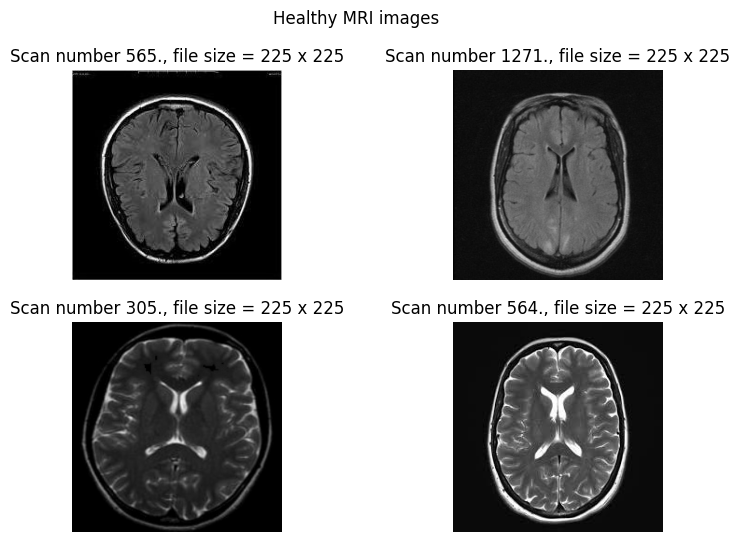




512
512
512
256


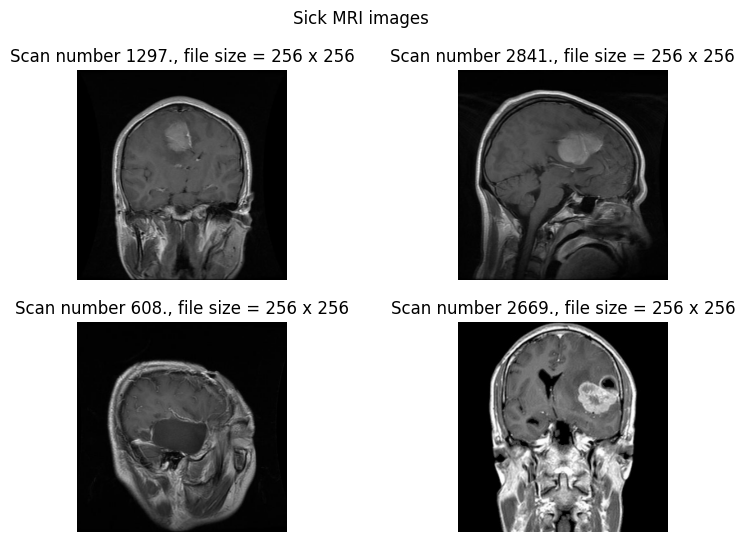

In [14]:
def show_images():
  cancer_scans_in_divisions = ["Healthy, CT scan images",
                              "Sick, CT scan images",
                              "Healthy MRI images",
                              "Sick MRI images"]
  print("Brain scans pre-classified by tumor occurence \n\n\n")

  for i, group in enumerate(image_files):

    images = [[None for _ in range(2)] for _ in range(2)]

    rand_img_indices = []

    for j in range(2):
      for k in range(2):
        rand_img_index = np.random.randint(low=0, high=len(group))
        if not rand_img_indices:
          rand_img_indices.append(np.random.randint(low=0, high=len(group)))
        else:
          if rand_img_index in rand_img_indices:
            while rand_img_index in rand_img_indices:
              rand_img_indices.append(np.random.randint(low=0, high=len(group)))
          else:
            rand_img_indices.append(np.random.randint(low=0, high=len(group)))
        imgpath = os.path.join(directories[i], group[rand_img_index])
        print(Image.open(imgpath).size[0])
        img = mpimg.imread(imgpath)
        images[j][k] = img

    random_img_indices_2d = [[rand_img_indices[x] for x in range(y*2, (y+1)*2)] for y in range(2)]

    fig, axes = plt.subplots(figsize=(9, 6),
                              nrows=2,
                              ncols=2
                            )


    for k, row in enumerate(axes):
      for l, element in enumerate(axes[k]):
        element.imshow(images[k][l], cmap="gray")
        element.set_title(f"Scan number {random_img_indices_2d[k][l]}., file size = {Image.open(imgpath).size[0]} x {Image.open(imgpath).size[1]}")
        element.axis('off')
    plt.suptitle(f"{cancer_scans_in_divisions[i]}")
    # plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
    print("\n\n")


In [ ]:
show_images()

In [15]:
"""
WIthin checking the current structure of the images with the dataset, I shall split the data into categories min-256px, 256-513, 513-max, within the
visualization, and the focus shall be redirected to the cancer positive images, due to their more specific (intricate) relationships between pixels (I assume)
"""

'\nWIthin checking the current structure of the images with the dataset, I shall split the data into categories min-256px, 256-513, 513-max, within the\nvisualization, and the focus shall be redirected to the cancer positive images, due to their more specific (intricate) relationships between pixels (I assume)\n'

In [17]:
cancer_scans_in_divisions = ["Healthy, CT scan images",
                             "Sick, CT scan images",
                             "Healthy MRI images",
                             "Sick MRI images"]
def images_by_their_size(min: int, max: int) -> None:
  print("Brain scans pre-classified by tumor occurence \n\n\n")

  for i, group in enumerate(image_files):
    images = [[None for _ in range(2)] for _ in range(2)]

    rand_img_indices = []

    current_false = 0
    limit = 100
    done = False

    for j in range(2):
      for k in range(2):
        while done != True or current_false >= limit:
          rand_img_index = np.random.randint(low=0, high=len(group))
          if not rand_img_indices:
            rand_img_indices.append(np.random.randint(low=0, high=len(group)))
          else:
            if rand_img_index in rand_img_indices:
              while rand_img_index in rand_img_indices:
                rand_img_indices.append(np.random.randint(low=0, high=len(group)))
            else:
              rand_img_indices.append(np.random.randint(low=0, high=len(group)))
          imgpath = os.path.join(directories[i], group[rand_img_index])
          if Image.open(imgpath).size[0] >= min and Image.open(imgpath).size[0] < max and Image.open(imgpath).size[0] >= min and Image.open(imgpath).size[0] < max:
            img = mpimg.imread(imgpath)
            images[j][k] = img
            done = True
          else:
            current_false += 1
            rand_img_indices[-1].pop()

    random_img_indices_2d = [[rand_img_indices[x] for x in range(y*2, (y+1)*2)] for y in range(2)]

    fig, axes = plt.subplots(figsize=(9, 6),
                              nrows=2,
                              ncols=2
                            )


    for k, row in enumerate(axes):
      for l, element in enumerate(axes[k]):
        element.imshow(images[k][l], cmap="gray")
        element.set_title(f"Scan number {random_img_indices_2d[k][l]}., file size = {Image.open(imgpath).size[0]} x {Image.open(imgpath).size[1]}")
        element.axis('off')
    plt.suptitle(f"{cancer_scans_in_divisions[i]}")
    # plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
    print("\n\n")


In [32]:
cancer_scans_in_divisions = ["Healthy, CT scan images",
                             "Sick, CT scan images",
                             "Healthy MRI images",
                             "Sick MRI images"]

def images_by_their_size(min_size: int, max_size: int, image_files = image_files) -> None:
    print("Brain scans pre-classified by tumor occurrence\n\n\n")

    for i, group in enumerate(image_files):
        images = [[None for _ in range(2)] for _ in range(2)]
        rand_img_indices = set()

        limit = 100
        for j in range(2):
            for k in range(2):
                attempts = 0
                while attempts < limit:
                    rand_img_index = np.random.randint(low=0, high=len(group))
                    if rand_img_index not in rand_img_indices:
                        imgpath = os.path.join(directories[i], group[rand_img_index])
                        img_size = Image.open(imgpath).size
                        if min_size <= img_size[0] < max_size and min_size <= img_size[1] < max_size:
                            rand_img_indices.add(rand_img_index)
                            img = mpimg.imread(imgpath)
                            images[j][k] = img
                            break
                    attempts += 1
                else:
                    print(f"Warning: Unable to find a valid image for position ({j}, {k})")
                    images[j][k] = None

        rand_img_indices = list(rand_img_indices)
        if len(rand_img_indices) < 4:
            print("Insufficient images were found to fill all slots.")
            continue

        random_img_indices_2d = [[rand_img_indices[y*2 + x] for x in range(2)] for y in range(2)]

        fig, axes = plt.subplots(figsize=(9, 6), nrows=2, ncols=2)
        for k, row in enumerate(axes):
            for l, ax in enumerate(row):
                if images[k][l] is not None:
                    ax.imshow(images[k][l], cmap="gray")
                    ax.set_title(f"Scan number {random_img_indices_2d[k][l]}., size = {Image.open(imgpath).size[0]} x {Image.open(imgpath).size[1]}")
                ax.axis('off')
        plt.suptitle(f"{cancer_scans_in_divisions[i]}")
        plt.show()
        print("\n\n")


Brain scans pre-classified by tumor occurrence





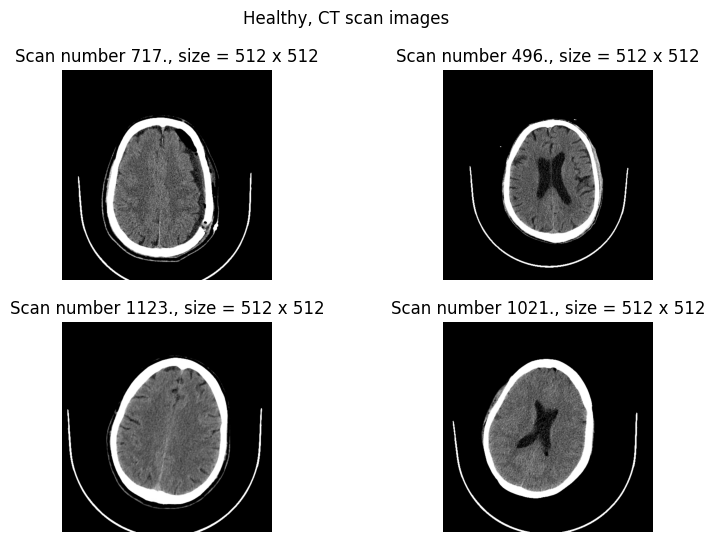




Insufficient images were found to fill all slots.


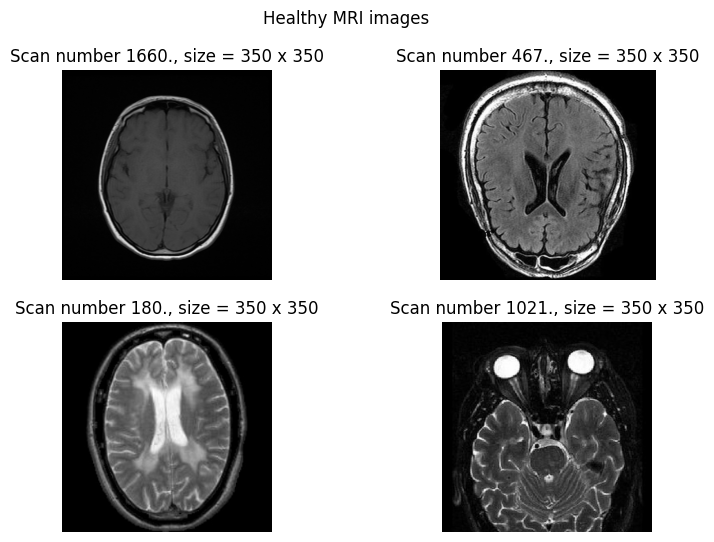

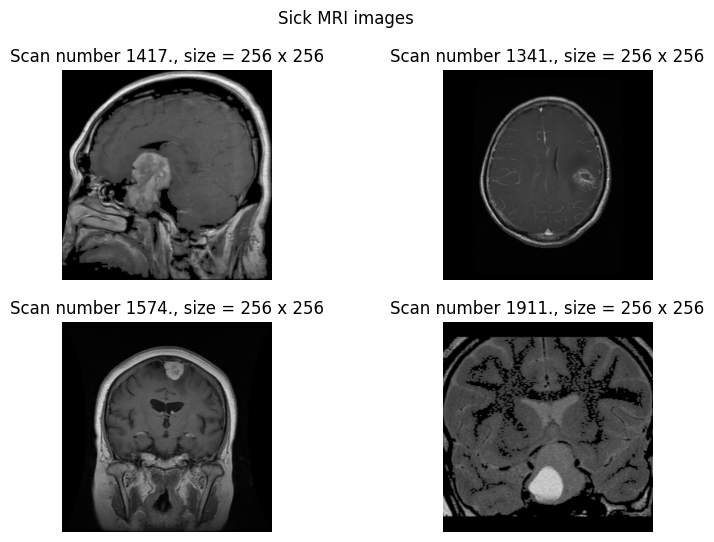

In [23]:
images_by_their_size(256, 513)

In [ ]:
"""
It seems that scaling the images
will be appropriate to 256 pixels by 256 pixels, this is 2^8, so for PC it will be perfect in terms of computational prowess, but generally 128x128 would be too
low, and some images could be too blurry, also we can infer this by the resolutions provided, for the dataset, data barely reaches 100's pixels, indicating
that doctors might find it cumbersome to find such images valid (NN should do this better, but we shall set some benchmark to start with firstly)
Thus normally I will try to use some architecture like maybe VGGnet (224x224 is quite similiar to my chosen value, and should preserve properly),
but I intended this notebook for exploratory, thus I won't use transfer learning, and with proper comprehension of the data, I shall create a CNN model, and then
my current idea is to transfer learn this model to another one, i.e. from CT -> MRI and reversively (this should give me a proper variation within the loss
function gradient landscape, the gradients shall be similiar for both of them... thus four models will be created (two auxiliary ones))

P.S. most images are within the square'ish shapes thus x * y (i.e. y = x), and additionally 2^8 = 256.

"""

For now I shall split the data into sets, but just afore that I will resize them to the desired pixel values, note that this sole action won't provide data leakage within the confounds of reason i.e. input must be stationary i.e. explanatory via it's non-relative size.

In [30]:
"""
directories = ["/brain_scans/1/Dataset/Brain Tumor CT scan Images/Healthy",
               "/brain_scans/1/Dataset/Brain Tumor CT scan Images/Tumor",
               "/brain_scans/1/Dataset/Brain Tumor MRI images/Healthy",
               "/brain_scans/1/Dataset/Brain Tumor MRI images/Tumor"
               ]
"""

from torchvision.transforms import v2

images_resized = [[] for _ in range(len(directories))]

resizer = v2.Resize((224, 224))

for i, group in enumerate(image_files):
  for j, path in enumerate(group):
    img_path = os.path.join(directories[i], path)
    images_resized[i].append(resizer(Image.open(img_path)))




In [35]:
for i, group in enumerate(images_resized):
  print(len(group))

1716
2157
1997
2984
